In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats()
display.set_matplotlib_formats('svg')

C:\Users\17485\AppData\Local\Temp\ipykernel_2896\1212015228.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [81]:
data = pd.read_feather('house_sales.ftr')

In [82]:
data.shape

(164944, 1789)

In [83]:
data.head()

,Id,Address,Sold Price,Sold On,Summary,Type,Year built,Heating,Cooling,Parking,...,Well Disclosure,remodeled,DOH2,SerialX,Full Baths,Tax Legal Lot Number,Tax Legal Block Number,Tax Legal Tract Number,Building Name,Zip
0,2080183300,"11205 Monterey,","$2,000,000",01/31/20,"11205 Monterey, San Martin, CA 95046 is a sing...",SingleFamily,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,95046
1,20926300,"5281 Castle Rd,","$2,100,000",02/25/21,Spectacular Mountain and incredible L.A. City ...,SingleFamily,1951,Central,"Central Air, Dual","Driveway, Driveway - Brick",...,None,None,None,None,None,None,None,None,None,91011
2,19595300,"3581 Butcher Dr,","$1,125,000",11/06/19,Eichler Style home! with Santa Clara High! in ...,SingleFamily,1954,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",...,None,None,None,None,None,None,None,None,None,95051
3,300472200,"2021 N Milpitas Blvd,","$36,250,000",10/02/20,"2021 N Milpitas Blvd, Milpitas, CA 95035 is a ...",Apartment,1989,Other,No Data,"Mixed, Covered",...,None,None,None,None,None,None,None,None,None,95035
4,2074492000,"LOT 4 Tool Box Spring Rd,","$140,000",10/19/20,Beautiful level lot dotted with pine trees ro...,VacantLand,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,92561


#### 1.缺失值清理(删除null占比超过30%的列)
> data[pd.series]可以选择数据

In [84]:
null_sum = data.isnull().sum() # isnull返回值为每一个数值是否为null,sum默认按行求和，即计算每一列的sum值
data.columns[null_sum < data.shape[0]*0.3]

Index(['Id', 'Address', 'Sold Price', 'Sold On', 'Summary', 'Type',
       'Year built', 'Heating', 'Cooling', 'Parking', 'Bedrooms', 'Bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Home type', 'Region', 'Elementary School', 'Elementary School Score',
       'Elementary School Distance', 'High School', 'High School Score',
       'High School Distance', 'Heating features', 'Parking features',
       'Lot size', 'Parcel number', 'Tax assessed value', 'Annual tax amount',
       'Listed On', 'Listed Price', 'Zip'],
      dtype='object')

In [85]:
data.drop(columns=data.columns[null_sum > data.shape[0]*0.3], inplace=True) # 删除列

In [86]:
numeric_col = ['Bathrooms', 'Total spaces', 'Garage spaces', 'Elementary School Score', 'Elementary School Distance'
           , 'High School Score', 'High School Distance']
for c in numeric_col:
    data[c] = data[c].astype(float)

In [87]:
data.dtypes

Id                              object
Address                         object
Sold Price                      object
Sold On                         object
Summary                         object
Type                            object
Year built                      object
Heating                         object
Cooling                         object
Parking                         object
Bedrooms                        object
Bathrooms                      float64
Total interior livable area     object
Total spaces                   float64
Garage spaces                  float64
Home type                       object
Region                          object
Elementary School               object
Elementary School Score        float64
Elementary School Distance     float64
High School                     object
High School Score              float64
High School Distance           float64
Heating features                object
Parking features                object
Lot size                 

#### 2.处理价格数据(删除符号$,-, 空字符转为null, 数据格式改为float)
> astype() 是 pandas 库中的一个函数，用于更改 DataFrame 或 Series 中元素的数据类型

In [88]:
currency = ['Sold Price', 'Listed Price', 'Tax assessed value', 'Annual tax amount']
for c in currency:
    data[c] = data[c].replace(
        r'[$,-]', '', regex=True).replace(
        r'^\s*$', np.nan, regex=True
        ).astype(float)

In [89]:
data[currency].dtypes

Sold Price            float64
Listed Price          float64
Tax assessed value    float64
Annual tax amount     float64
dtype: object

#### 3.处理面积数据(删除 sqft和 Acres和逗号(,), 单位换算:43560 sqft = 1 Acres)
> 正则表达式 | 代表或者

In [90]:
areas = ['Lot size', 'Total interior livable area']
for c in areas:
    acres = data[c].str.contains('Acres') == True
    col = data[c].replace(
        r'\b sqft\b|\b Acres\b|\b,\b', '', regex=True
    ).astype(float)
    col[acres] *= 43560
    data[c] = col

#### 4.查看所有数值型数据的基本统计量

In [91]:
data.describe()

,Sold Price,Bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Lot size,Tax assessed value,Annual tax amount,Listed Price
count,1.648590e+05,141791.000000,1.465450e+05,156738.000000,156736.000000,145676.000000,146288.000000,144511.000000,145451.000000,1.358450e+05,1.450650e+05,1.433500e+05,1.250060e+05
mean,1.194842e+06,2.303087,3.182221e+03,1.706044,1.607614,5.654892,1.260918,6.086485,2.573214,9.525061e+05,8.898781e+05,1.123415e+04,1.197671e+06
std,3.336365e+06,1.646634,4.609881e+05,28.802242,28.782370,2.098547,2.888909,2.033379,4.067624,1.357197e+08,3.126888e+06,3.859389e+04,2.874721e+06
min,1.000000e+00,0.000000,1.000000e+00,-26.000000,-26.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.350000e+05,2.000000,1.170000e+03,0.000000,0.000000,4.000000,0.300000,5.000000,0.800000,4.800000e+03,2.550000e+05,3.434250e+03,4.990000e+05
50%,8.050000e+05,2.000000,1.558000e+03,1.000000,1.000000,6.000000,0.500000,6.000000,1.400000,6.603000e+03,5.635010e+05,7.372000e+03,8.490000e+05
75%,1.370000e+06,3.000000,2.144000e+03,2.000000,2.000000,7.000000,1.000000,8.000000,2.500000,1.209000e+04,1.033832e+06,1.321300e+04,1.395000e+06
max,8.660000e+08,256.000000,1.764164e+08,9999.000000,9999.000000,10.000000,76.400000,10.000000,77.800000,4.856770e+10,8.256328e+08,9.977342e+06,6.250000e+08


#### 5.选择正常的数据
> 选择列 : filter_columns = data.columns[所有列的布尔类型pd.series] , data.drop(filter_columns)  
> 选择行 : data[所有行的布尔类型pd.series]

In [92]:
abnormal = (data[areas[0]]<10) | (data[areas[0]]>1e4)
data = data[~abnormal]
print('删除数据量:{}, 处理后数据量:{}'.format(sum(abnormal), data.shape[0]))

删除数据量:41000, 处理后数据量:123944


#### 6.观察卖价sold Price

[Text(3, 0, '1e+03'),
 Text(4, 0, '1e+04'),
 Text(5, 0, '1e+05'),
 Text(6, 0, '1e+06'),
 Text(7, 0, '1e+07'),
 Text(8, 0, '1e+08')]

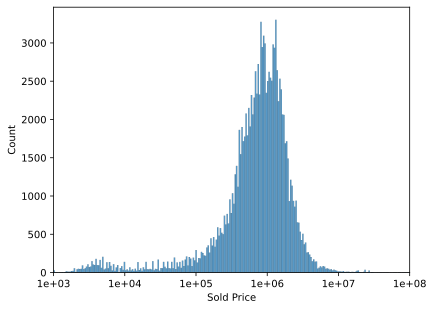

In [95]:
ax = sns.histplot(np.log10(data['Sold Price']))
ax.set_xlim([3, 8])
ax.set_xticks(range(3, 9))
ax.set_xticklabels(['{:.0e}'.format(a) for a in 10**ax.get_xticks()])

#### 7. 观察type的种类,并计算数量

In [105]:
data['Type'].value_counts()[:20] # value_counts计算唯一值的数量

Type
SingleFamily            74318
Condo                   18749
MultiFamily              6586
VacantLand               6199
Townhouse                5846
Unknown                  5390
MobileManufactured       2588
Apartment                1416
Cooperative               161
Residential Lot            75
Single Family              69
Single Family Lot          56
Acreage                    48
2 Story                    39
3 Story                    25
Hi-Rise (9+), Luxury       21
RESIDENTIAL                19
Duplex                     19
Condominium                19
Mid-Rise (4-8)             17
Name: count, dtype: int64

#### 8.创建一个核密度估计（Kernel Density Estimation，KDE）图，用于展示不同类型（'SingleFamily', 'Condo', 'MultiFamily', 'Townhouse'）的房产的售价分布

c:\Users\17485\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\17485\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\17485\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

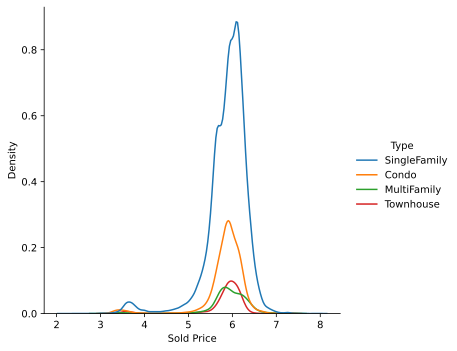

In [101]:
types = data['Type'].isin(['SingleFamily', 'Condo', 'MultiFamily', 'Townhouse'])
sns.displot(
    pd.DataFrame({'Sold Price':np.log10(data[types]['Sold Price']),
                  'Type':data[types]['Type']}),
    x='Sold Price', hue='Type', kind='kde'
)

c:\Users\17485\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


(0.0, 2000.0)

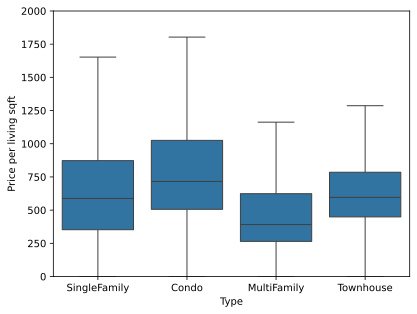

In [103]:
data['Price per living sqft'] = data['Sold Price']/data['Total interior livable area']
ax = sns.boxplot(x='Type', y='Price per living sqft', data=data[types], fliersize=0) # fliersize:异常值标记的大小
ax.set_ylim([0, 2000])

#### 9. 计算特征之间的协方差(相关性)

<Axes: >

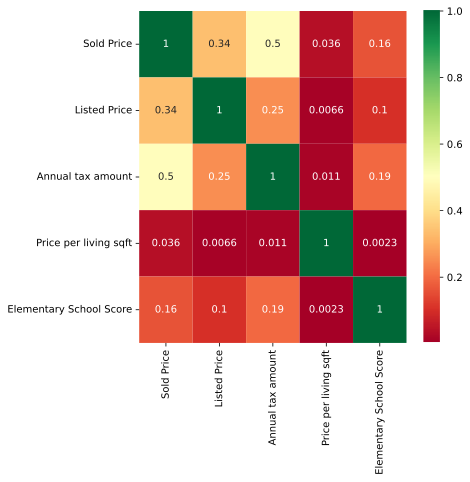

In [106]:
_, ax = plt.subplots(figsize=(6,6))
columns = ['Sold Price', 'Listed Price', 'Annual tax amount', 'Price per living sqft','Elementary School Score' ]
sns.heatmap(data[columns].corr(), annot=True, cmap='RdYlGn', ax=ax)